# Credit Card Fraud Detection
Anonymized credit card transactions labeled as fraudulent or genuine

In this dataset, we have the feature 'Class,' which is what we're trying to predict. When 'Class' is equal to 1, it means the transaction is fraudulent, and when it's 0, it means the transaction is not fraudulent.

The dataset comprises numerical features about the credit card transactions. We have features labeled V1 through V28, which are basically mathematical summaries of the transaction details obtained using a technique called PCA (Principal Component Analysis). Don't worry too much about what PCA is for now; just know that these features help us understand the transactions better.
Credit card transaction datasets often contain a large number of features, such as transaction amount, merchant ID, location, time, and more. These features can result in high-dimensional data, making it challenging to analyze and build models effectively. PCA can also be used to anonymize sensitive data, such as credit card transaction details.

Two features, 'Time' and 'Amount', are not transformed using PCA. 'Time' tells us how much time has passed since the first transaction, but we won't use it in our training. 'Amount' tells us the transaction amount, and we will do some transformations on it to make it more useful for our analysis.

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Libraries used

In [ ]:
from keras.src.metrics.confusion_metrics import FalsePositives
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from sklearn.metrics import confusion_matrix
from keras.metrics import FalseNegatives, FalsePositives, TrueNegatives, TruePositives, Precision, Recall, BinaryAccuracy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

Load the data from the csv file creditcard.csv into a pandas dataframe. Use the variable df for the dataframe.
Display the first 5 records in the dataframe.

In [ ]:
file_path = "creditcard_sample.csv"
df = pd.read_csv(file_path)

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,30714,-2.574861,-3.159709,-0.066802,-2.342403,-4.109518,1.277935,4.314675,-0.973984,-0.154314,...,-0.624611,-0.895640,0.757427,0.349402,0.108809,-0.341502,0.329811,-0.314936,1200.00,0
19996,30716,1.172969,0.221508,0.622677,0.650761,-0.406620,-0.690456,0.049612,-0.127383,-0.079778,...,-0.194160,-0.523100,0.188783,0.413152,0.118688,0.100692,-0.010056,0.022251,12.99,0
19997,30716,-1.061245,0.721735,0.569426,-0.145278,-0.093611,-1.423052,0.712580,0.209606,-0.392517,...,0.169586,0.389166,0.094515,0.767622,-0.357250,0.267907,0.220411,0.121707,60.00,0
19998,30717,-0.975430,-1.649324,1.581357,-1.379578,-0.152562,-0.201571,-0.763894,0.004300,-2.281788,...,-0.406639,-0.458034,0.976208,-0.411276,-0.610035,-0.373744,0.016157,-0.172344,15.50,0


# Class distribution in the dataset
Use pandas' `value_counts` to determine the Class distribution in the dataset. Then, create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) using seaborn to visualize the class distribution. Based on your analysis, is the dataset balanced or imbalanced?

In [ ]:
df['Class'].value_counts()

0    19915
1       85
Name: Class, dtype: int64

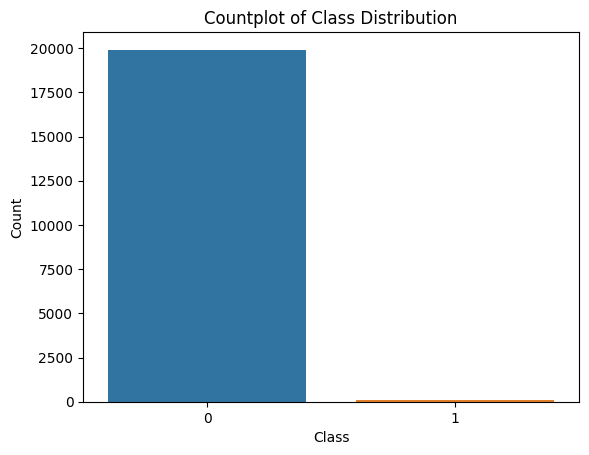

In [ ]:
# Create the countplot
sns.countplot(x='Class', data=df)

# Enhance the plot with labels and title (optional)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Countplot of Class Distribution')

# Display the plot
plt.show()

## Data processing
Remove feature 'Time' from the dataset.

In [ ]:
df = df.drop('Time', axis=1)

## Split the dataset

In [ ]:
X = df.drop(columns=["Class"], axis=1)
y = df["Class"]

Split the dataset in a trainingset and a testset.

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

How many features are there in the (training) data?

In [ ]:
num_features = len(X_train.columns)
print(f"Number of features: {num_features}")
# OR
num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

Number of features: 29
Number of features: 29


## Data processing
What is the range of the variable 'Amount'?

In [ ]:
X_train['Amount'].describe()

count    16000.000000
mean         0.008806
std          0.025965
min          0.000000
25%          0.000742
50%          0.002027
75%          0.007602
max          1.000000
Name: Amount, dtype: float64

Reduce this wide range using Normalization or Standardization. It is important to note that the scaler should be fitted to the training and the test data, rather than to the entire dataset, in order to prevent leakage of information from the test data.

In [ ]:
# Min-Max normalization
# Use Min-Max normalization if you need to bound values between 0 and 1 and when you know the approximate upper and lower bounds of your data.
min_max_scaler = MinMaxScaler()
train_amount = min_max_scaler.fit_transform(X_train[["Amount"]])
X_train_scaled = X_train
X_train_scaled["Amount"] = train_amount

test_amount =  min_max_scaler.transform(X_test[["Amount"]])
X_test_scaled = X_test
X_test_scaled["Amount"] = test_amount

In [ ]:
X_train_scaled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
19493,1.202871,-0.063828,0.380373,-0.178302,-0.485050,-0.537898,-0.173654,0.060239,0.032004,-0.054713,...,-0.147665,-0.147288,-0.453937,0.162943,0.247418,0.018129,0.849437,-0.078457,-0.009183,0.000127
11884,-2.322010,-2.691396,0.754978,0.021225,-1.669255,0.253903,2.046121,-0.230177,-0.538370,-0.661008,...,1.483496,0.063118,-0.766524,1.804665,-0.065243,0.324217,1.144459,-0.325676,0.121355,0.097680
13269,-2.039728,0.965692,2.166568,-0.005581,-0.086848,-0.098832,-0.216829,0.198205,1.605322,0.364846,...,-0.117448,-0.275567,-0.262577,-0.351295,0.157698,-0.031629,0.211652,0.217463,0.219128,0.004611
11158,-0.442487,1.289264,1.782040,1.202763,-0.242006,-0.843543,0.519311,-0.371493,1.128661,0.005898,...,0.219749,-0.397573,-0.757737,0.019546,0.577343,-0.623177,0.212147,-0.112359,-0.024295,0.000339
8477,-0.872882,0.880470,2.213435,-1.216853,0.287125,-0.337387,0.662548,-0.320847,0.939137,-0.767170,...,0.003681,-0.216698,-0.386504,-0.318667,-0.003705,0.076236,0.738860,-0.508286,-0.190278,0.001123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,-0.666814,0.490791,1.008168,0.919200,0.411510,-0.820747,0.570446,0.005280,-0.277012,0.018570,...,0.271303,0.132533,0.273912,0.008159,-0.008056,-0.157407,-0.291639,0.375067,0.231056,0.006978
11114,-0.360520,0.708974,1.840150,0.945089,-0.272527,-0.196333,0.338953,0.038130,0.893430,-0.566848,...,0.034892,-0.193584,-0.252039,0.014811,0.498893,-0.462534,0.273560,0.077768,0.126080,0.004257
4668,-0.714847,1.288490,1.714777,0.146772,0.016590,-0.588978,0.536608,-0.031472,1.024068,-0.423195,...,0.147270,-0.358926,-0.612018,0.063119,0.322711,-0.275940,0.046264,0.367403,0.173506,0.000570
8391,1.126968,0.707538,-0.012331,2.555788,0.734877,-0.005958,0.513535,-0.257664,0.120131,0.273549,...,-0.064932,-0.129741,-0.179965,-0.180365,-0.461488,0.711836,0.082436,-0.054350,0.005878,0.006819


Neural networks can't handle pandas dataframes, but the min_max_scaler output is a numpy array. Numpy array are usable as input for a neural network.

## Build a binary classification model

Create a neural network with an input layer with 32 neurons and ReLU activation, three hidden layers, each with 32 neurons and ReLU activation.
And finally, the output layer. How many neurons do you need for a binary classifcation problem? Which activation function will you use?

Create a summary of the network. How many trainable parameters are there?

In [ ]:
# Define the model
model = Sequential()

model.add(Input(shape=(29,)))

# Add 3 hidden layers with 32 neurons and ReLU activation
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3105 (12.13 KB)
Trainable params: 3105 (12.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model
The next step is to compile the neural network. Provide two functions: a loss function and an optimizer. The loss function evaluates the set of weights by how well the model predicts, while the optimizer modifies the weights to reduce the loss. The list of metrics below is also provided to the compile() method. Metric values are displayed during fit() (training) and logged to the History-object returned by fit().


In [ ]:
from keras.src.metrics import BinaryAccuracy
metrics = [
  FalseNegatives(name="fn"),
  FalsePositives(name="fp"),
  TrueNegatives(name="tn"),
  TruePositives(name="tp"),
  Precision(name="precision"),
  Recall(name="recall"),
  BinaryAccuracy(name="accuracy")
]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

**Remark:** When you pass the strings 'accuracy' or 'acc' to the metrics for , we convert this to one of tf.keras.metrics.BinaryAccuracy, tf.keras.metrics.CategoricalAccuracy, tf.keras.metrics.SparseCategoricalAccuracy based on the loss function used and the model output shape. We do a similar conversion for the strings 'crossentropy' and 'ce' as well. https://stackoverflow.com/questions/65023353/difference-between-keras-metrics-accuracy-and-accuracy

## Train the model

Call fit() to train the model. Use batches with batch_size 2048 and iterate 10 times over the entire dataset. Because you are coping with an imbalanced dataset, it's a good idea to provide different weights for each class when using the loss function.

In [ ]:
class_weight = {0: 0.5, 1: 5.}

In [ ]:
hist = model.fit(X_train_scaled, y_train, batch_size=2048, epochs=10, verbose=1, class_weight=class_weight)

Epoch 1/10
8/8 [==============================] - 3s 12ms/step - loss: 0.2783 - fn: 52.0000 - fp: 1404.0000 - tn: 14523.0000 - tp: 21.0000 - precision: 0.0147 - recall: 0.2877 - accuracy: 0.9090
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.1891 - fn: 33.0000 - fp: 77.0000 - tn: 15850.0000 - tp: 40.0000 - precision: 0.3419 - recall: 0.5479 - accuracy: 0.9931
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.1257 - fn: 33.0000 - fp: 29.0000 - tn: 15898.0000 - tp: 40.0000 - precision: 0.5797 - recall: 0.5479 - accuracy: 0.9961
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 0.0846 - fn: 29.0000 - fp: 27.0000 - tn: 15900.0000 - tp: 44.0000 - precision: 0.6197 - recall: 0.6027 - accuracy: 0.9965
Epoch 5/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0595 - fn: 23.0000 - fp: 27.0000 - tn: 15900.0000 - tp: 50.0000 - precision: 0.6494 - recall: 0.6849 - accuracy: 0.9969
Epoch 6/10
8/8 [=================

## Evaluate the model
Evaluate the model on the test data using the methode 'evaluate'.
Display the confusion matrix for the model on the test dataset.

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=len(y_test))
# Extracting and printing the metrics
_, fn, fp, tn, tp, _, _, accuracy = results
print(f"fn: {fn}")
print(f"fp: {fp}")
print(f"tn: {tn}")
print(f"tp: {tp}")
print(f"accuracy: {accuracy}")

1/1 [==============================] - 1s 1s/step - loss: 0.0200 - fn: 1.0000 - fp: 6.0000 - tn: 3982.0000 - tp: 11.0000 - precision: 0.6471 - recall: 0.9167 - accuracy: 0.9983
fn: 1.0
fp: 6.0
tn: 3982.0
tp: 11.0
accuracy: 0.9982500076293945


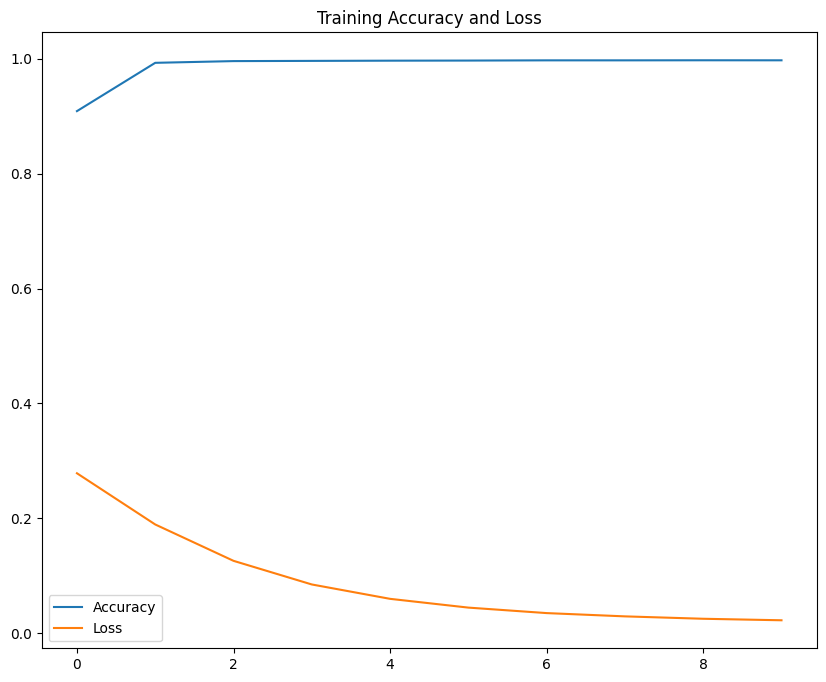

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
# Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)

125/125 [==============================] - 1s 3ms/step


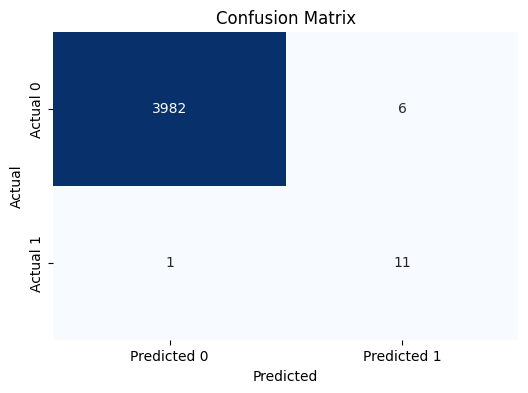

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### (optional) Addressing the dataset imbalance

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Retrieve the count of fraudulent transactions from y_train
fraudulent_transactions_count = y_train.value_counts()[1]  # Assuming 1 represents fraudulent transactions

# Define the desired number of samples for the majority class
desired_majority_class_samples = 500

# Create the sampling strategy using the actual count of fraudulent transactions in y_train
sampling_strategy = {0: desired_majority_class_samples, 1: fraudulent_transactions_count}

# Initialize RandomUnderSampler with the correct sampling strategy
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

# Check the new class distribution
y_resampled.value_counts()

0    500
1     73
Name: Class, dtype: int64

In [ ]:
hist = model.fit(X_resampled, y_resampled, batch_size=32, epochs=10, verbose=1, class_weight=class_weight)

Epoch 1/10
18/18 [==============================] - 0s 5ms/step - loss: 0.1900 - fn: 6.0000 - fp: 4.0000 - tn: 496.0000 - tp: 67.0000 - precision: 0.9437 - recall: 0.9178 - accuracy: 0.9825
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0985 - fn: 3.0000 - fp: 9.0000 - tn: 491.0000 - tp: 70.0000 - precision: 0.8861 - recall: 0.9589 - accuracy: 0.9791
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0760 - fn: 2.0000 - fp: 5.0000 - tn: 495.0000 - tp: 71.0000 - precision: 0.9342 - recall: 0.9726 - accuracy: 0.9878
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.0589 - fn: 2.0000 - fp: 4.0000 - tn: 496.0000 - tp: 71.0000 - precision: 0.9467 - recall: 0.9726 - accuracy: 0.9895
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.0481 - fn: 1.0000 - fp: 4.0000 - tn: 496.0000 - tp: 72.0000 - precision: 0.9474 - recall: 0.9863 - accuracy: 0.9913
Epoch 6/10
18/18 [==============================] 

In [ ]:
results = model.evaluate(X_test, y_test, batch_size=len(y_test))
print("Test Loss: %.3f\nTest Accuracy: %.3f" %(results[0], results[1]))

1/1 [==============================] - 0s 78ms/step - loss: 0.0548 - fn: 0.0000e+00 - fp: 34.0000 - tn: 3954.0000 - tp: 12.0000 - precision: 0.2609 - recall: 1.0000 - accuracy: 0.9915
Test Loss: 0.055
Test Accuracy: 0.000


In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
# Convert probabilities to binary predictions
conf_matrix = confusion_matrix(y_test, y_pred_binary)

125/125 [==============================] - 0s 3ms/step


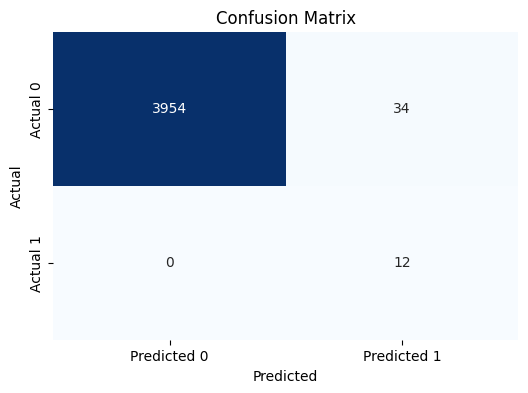

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()